# 랜덤 포레스트 연습

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pydotplus
import graphviz
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#경고 무시
import warnings 
warnings.filterwarnings('ignore')

matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

In [7]:
df = pd.read_csv("./실습화일/1 Big Data 분석 기초/체질검사.csv", encoding = 'euc-kr')
display(df.head())

df.isnull().sum()

#'WEIGHT', 'HEIGHT' 뒤의 단위를 잘라준 후, float로 데이터 타입 지정 
df[['WEIGHT','WEIGHT_UNIT']] = df['WEIGHT'].str.split(expand=True)
df[['HEIGHT','HEIGHT_UNIT']] = df['HEIGHT'].str.split(expand=True)
df['WEIGHT'] = df['WEIGHT'].astype('float64')
df['HEIGHT'] = df['HEIGHT'].astype('float64')

df=df.drop(['WEIGHT_UNIT','HEIGHT_UNIT'],axis = 1)
df_dummy = pd.get_dummies(df,drop_first=True)

df_y = df_dummy["FAT"]
df_x = df_dummy.drop("FAT",axis=1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))
df_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


train data X size: (176, 14)
train data Y size: (176,)
test data X size: (76, 14)
test data Y size: (76,)


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


In [8]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.956
Score on test set: 0.615


In [9]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,21)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimator"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.934,0.560
1,20,0.945,0.596
2,30,0.950,0.618
3,40,0.954,0.610
4,50,0.954,0.611
5,60,0.955,0.611
6,70,0.955,0.612
7,80,0.956,0.611
8,90,0.956,0.612
9,100,0.956,0.615


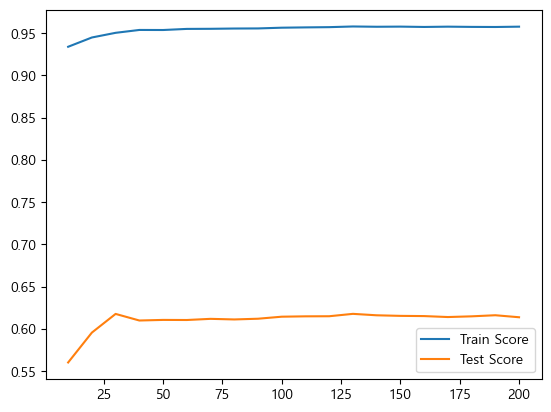

In [10]:
plt.plot(para_n_tree, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle ="-", label = "Test Score")
plt.legend()

In [11]:
train_score = []
test_score = []

para_leaf = [n_leaf *1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators = 100,min_samples_leaf=v_min_samples_leaf, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.956,0.615
1,2,0.940,0.614
2,3,0.916,0.611
3,4,0.892,0.620
4,5,0.869,0.624
5,6,0.850,0.629
6,7,0.830,0.627
7,8,0.816,0.621
8,9,0.800,0.618
9,10,0.785,0.619


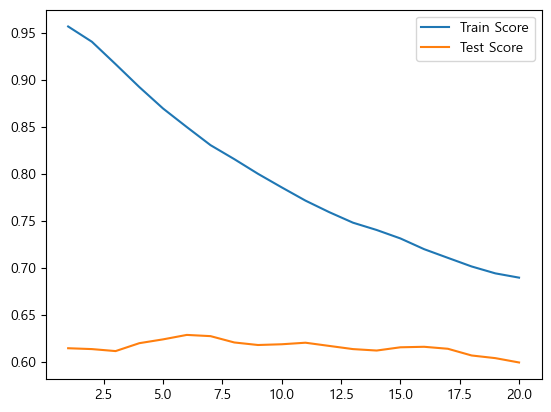

In [12]:
plt.plot(para_leaf, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle ="-", label = "Test Score")
plt.legend()

In [13]:
train_score = []
test_score = []

para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators = 100,min_samples_leaf=6,min_samples_split=v_min_samples_split, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.850,0.629
1,6,0.850,0.629
2,8,0.850,0.629
3,10,0.850,0.629
4,12,0.850,0.629
5,14,0.840,0.630
6,16,0.831,0.629
7,18,0.821,0.629
8,20,0.813,0.627
9,22,0.803,0.627


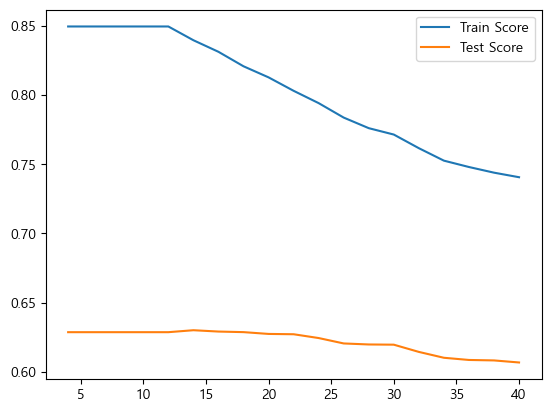

In [14]:
plt.plot(para_split, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle ="-", label = "Test Score")
plt.legend()

In [15]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators = 100,min_samples_leaf=6,min_samples_split=14,max_depth=v_max_depth, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.789,0.620
3,4,0.825,0.628
4,5,0.837,0.631
5,6,0.839,0.630
6,7,0.840,0.630
7,8,0.840,0.630
8,9,0.840,0.630
9,10,0.840,0.630


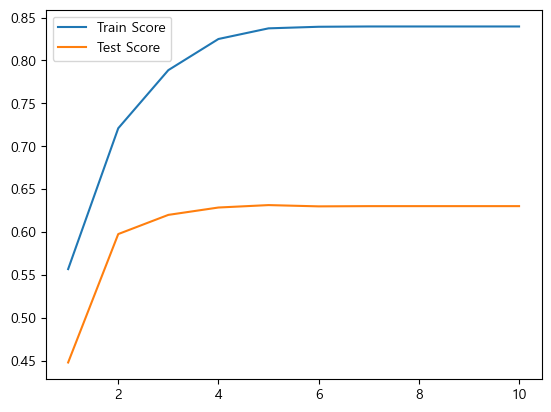

In [16]:
plt.plot(para_depth, train_score, linestyle ="-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle ="-", label = "Test Score")
plt.legend()

In [17]:
rf_final = RandomForestRegressor(random_state=1234,n_estimators = 100, min_samples_leaf=6,min_samples_split=14,max_depth=4)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.825
Score on test set: 0.628


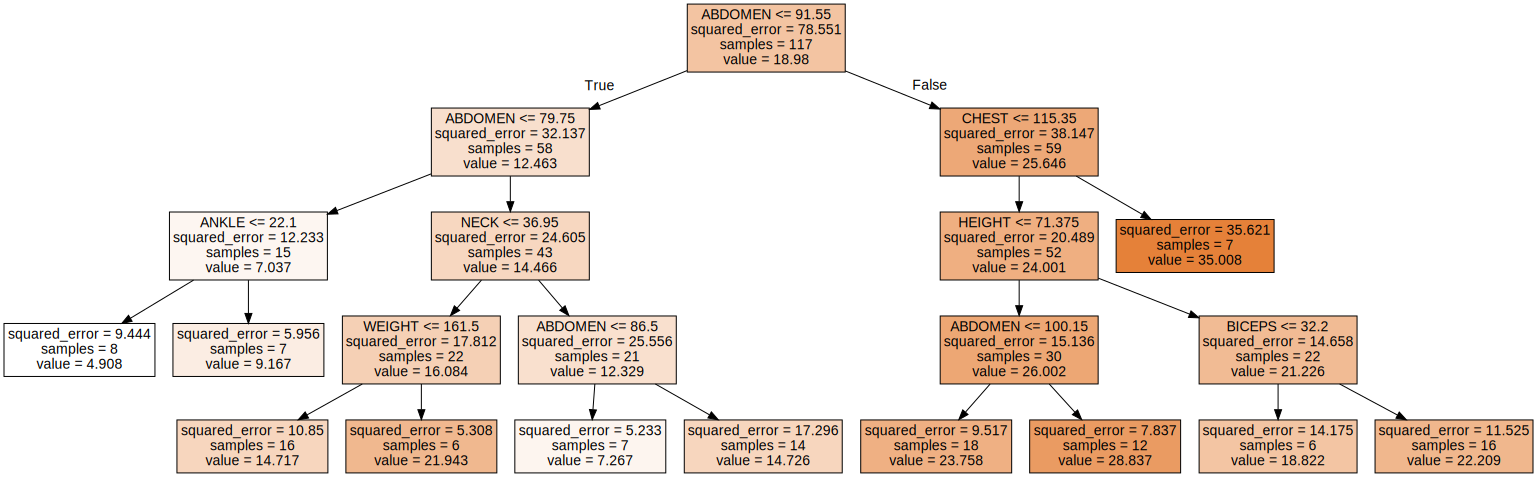

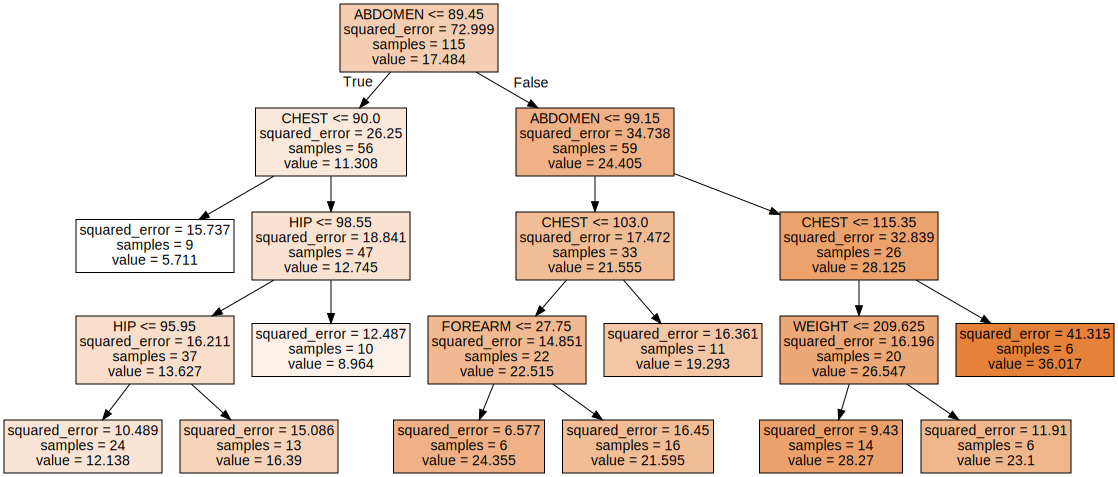

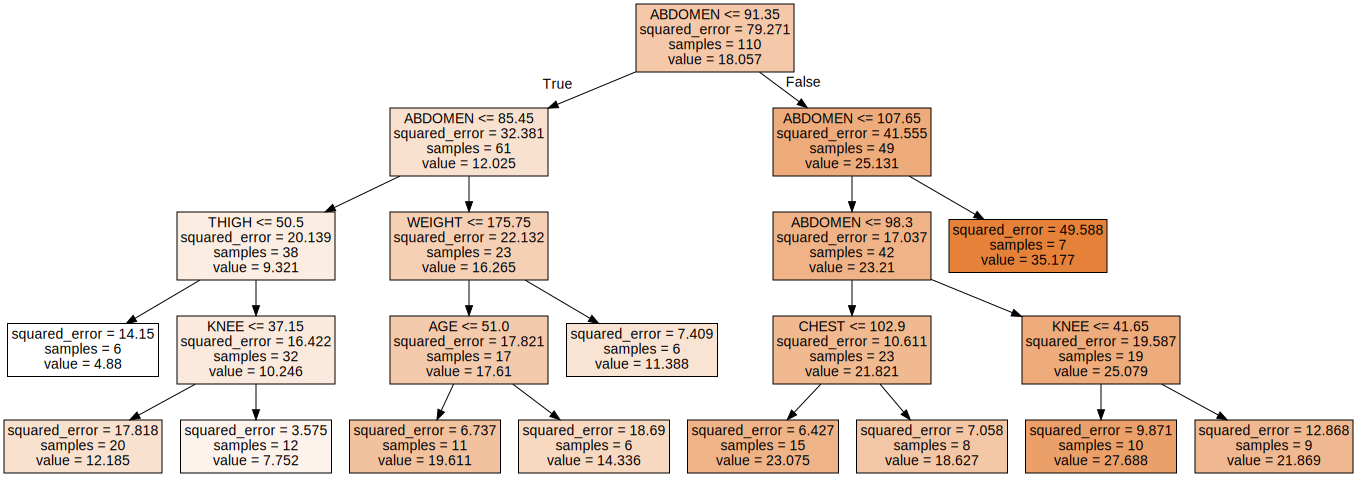

In [18]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot",
               feature_names=v_feature_name, impurity=True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

export_graphviz(rf_final.estimators_[1], out_file="rfr_final_1.dot",
               feature_names=v_feature_name, impurity=True, filled = True)
with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

export_graphviz(rf_final.estimators_[10], out_file="rfr_final_10.dot",
               feature_names=v_feature_name, impurity=True, filled = True)
with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [19]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.843
4,CHEST,0.036
2,HEIGHT,0.032
0,AGE,0.014
6,HIP,0.013
7,THIGH,0.011
3,NECK,0.010
12,WRIST,0.010
8,KNEE,0.009
1,WEIGHT,0.009


Text(0, 0.5, '변수')

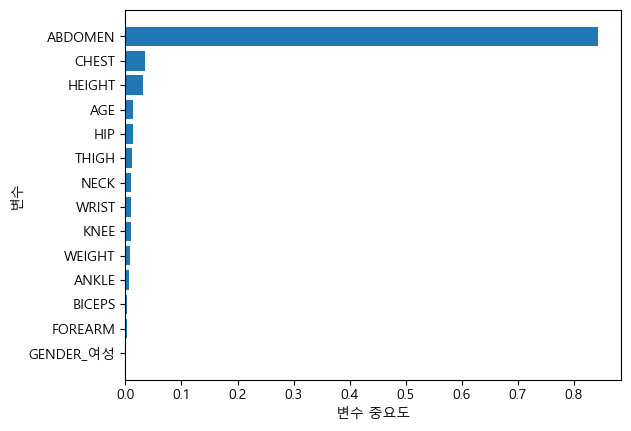

In [20]:
df_importance.sort_values("Importance",ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [22]:
estimator = RandomForestRegressor(random_state=1234)
param_grid = {"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs=-1)
grid_rf.fit(df_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_))

best estimator model:
RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=4,
                      random_state=1234)

best parameter:
{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 4}

best score:
0.6782340784393213
